In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report,r2_score, mean_absolute_error, mean_squared_error, r2_score,mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import preprocessing
from scipy.stats import f_oneway
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
import optuna

The possum data set downloaded from https://www.kaggle.com/datasets/abrambeyer/openintro-possum consists data of 104 mountain brushtail possums, trapped at seven sites from Southern Victoria to central Queensland.The dataset has 14 columns.

In [2]:
#load the data set
data_frame = pd.read_csv('./possum.csv')

In [3]:
#load the first 10 entries in the dataset
data_frame.head(10)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
5,6,1,Vic,f,1.0,93.1,54.8,90.5,35.5,73.2,53.6,14.2,30.0,32.0
6,7,1,Vic,m,2.0,95.3,58.2,89.5,36.0,71.5,52.0,14.2,30.0,34.5
7,8,1,Vic,f,6.0,94.8,57.6,91.0,37.0,72.7,53.9,14.5,29.0,34.0
8,9,1,Vic,f,9.0,93.4,56.3,91.5,37.0,72.4,52.9,15.5,28.0,33.0
9,10,1,Vic,f,6.0,91.8,58.0,89.5,37.5,70.9,53.4,14.4,27.5,32.0


In [4]:
#use the method describe to check data
data_frame.describe().T

,count,mean,std,min,25%,50%,75%,max
case,104.0,52.500000,30.166206,1.0,26.750,52.50,78.250,104.0
site,104.0,3.625000,2.349086,1.0,1.000,3.00,6.000,7.0
age,102.0,3.833333,1.909244,1.0,2.250,3.00,5.000,9.0
hdlngth,104.0,92.602885,3.573349,82.5,90.675,92.80,94.725,103.1
skullw,104.0,56.883654,3.113426,50.0,54.975,56.35,58.100,68.6
totlngth,104.0,87.088462,4.310549,75.0,84.000,88.00,90.000,96.5
taill,104.0,37.009615,1.959518,32.0,35.875,37.00,38.000,43.0
footlgth,103.0,68.459223,4.395306,60.3,64.600,68.00,72.500,77.9
earconch,104.0,48.130769,4.109380,40.3,44.800,46.80,52.000,56.2
eye,104.0,15.046154,1.050374,12.8,14.400,14.90,15.725,17.8


In [5]:
#check unique values for the columns "Site" and "Pop"
print(data_frame['site'].unique(), data_frame['Pop'].unique())

[1 2 3 4 5 6 7] ['Vic' 'other']


### Features
1. Case - observation number - numerical data 1-104,
2. Site - the site number where the possum was trapped - categorical data (1, 2, 3, 4, 5, 6, 7),
3. Pop - Population, either Vic (Victoria) or other (New South Wales or Queensland) - categorical data,
4. Sex - Gender, either m (male) or f (female) - categorical data,
5. Age - age of possum - numerical data, 1-9,
6. Hdlngth - Head length (mm) - numerical data (82.5 - 103.1),
7. Skullw - Skull width (mm) - numerical data (50.0 - 68.6),
8. Totlngth - Total length (cm) - numerical data (75.0 - 96.5),
9. Taill - Tail length (cm) - numerical data (32.0 - 43.0),
10. Foot lengt - numerical data (60.3 - 77.9),
11. Earconch - ear conch length - numerical data (40.3 - 56.2),
12. Eye - distance from medial canthus to lateral canthus of right eye - numerical data (12.8 - 18.8),
13. Chest - chest girth (cm) - numerical data (22.0 - 32.0),
14. Belly - belly girth (cm) - numerical data (25.0 - 40.0).

In [6]:
#use the info method to check dataset
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   Pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [7]:
#count missing observations
data_frame.isnull().sum()

case        0
site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

Usuing `info()` and `isnull` method we know that almost each column has 104 rows. It seems that we missing 2 rows data in the column "age" and 1 row is missing in the column "footlgth". I decided to fill missing observations with the mean values in the columns.

In [8]:
#create a new dataframe with mean value for each column
column_means = data_frame.mean(numeric_only=True)

In [9]:
#fill NA values with the mean values
data_frame = data_frame.fillna(column_means)

### The possum populations

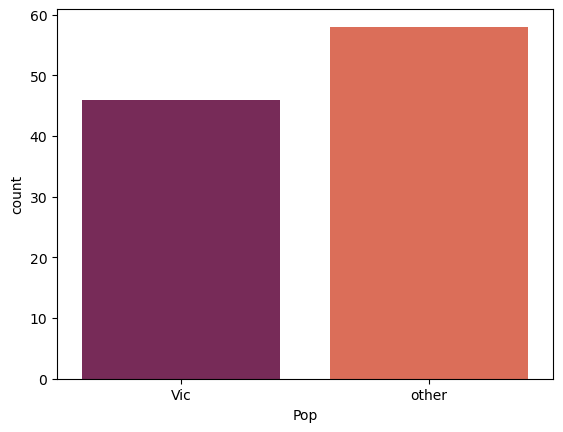

In [10]:
ax = sns.countplot(x='Pop', data=data_frame, palette="rocket")
plt.show()

In [11]:
#check the population sizes
populations = data_frame['Pop'].value_counts()
populations

other    58
Vic      46
Name: Pop, dtype: int64

Most of the possums in the dataset are from the Victoria population, beacuse two populations are included in "Other": New South Wales or Queensland, and 58 possums are from these two populations, while 43 possums are from the Victoria population.

In [12]:
# label encoding for categorical data
label_encoder = preprocessing.LabelEncoder()
# encode labels in column 'Pop'
data_frame['Pop']= label_encoder.fit_transform(data_frame['Pop'])

### Possums gender

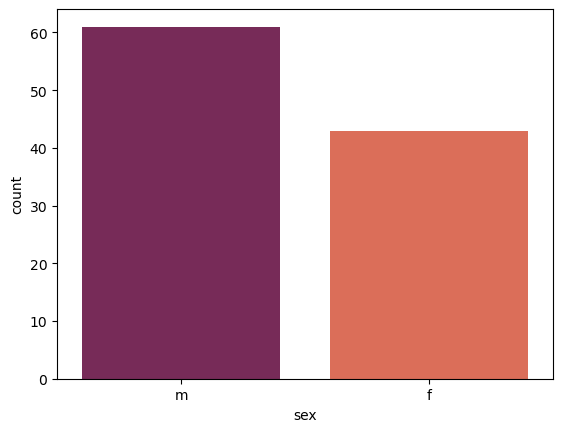

In [13]:
ax = sns.countplot(x='sex', data=data_frame, palette="rocket")
plt.show()

In [14]:
#check genders sizes
gender = data_frame['sex'].value_counts()
gender

m    61
f    43
Name: sex, dtype: int64

Most of the possums in the dataset are male - 59. There are 42 females possums in the dataset.
#### Check if the age and dimenssion of the possum is dependent on its gender

In [15]:
#create a data frame only with age and possum dimensions
numerical_cols = data_frame.drop(['case','site','Pop', 'sex'], axis=1)

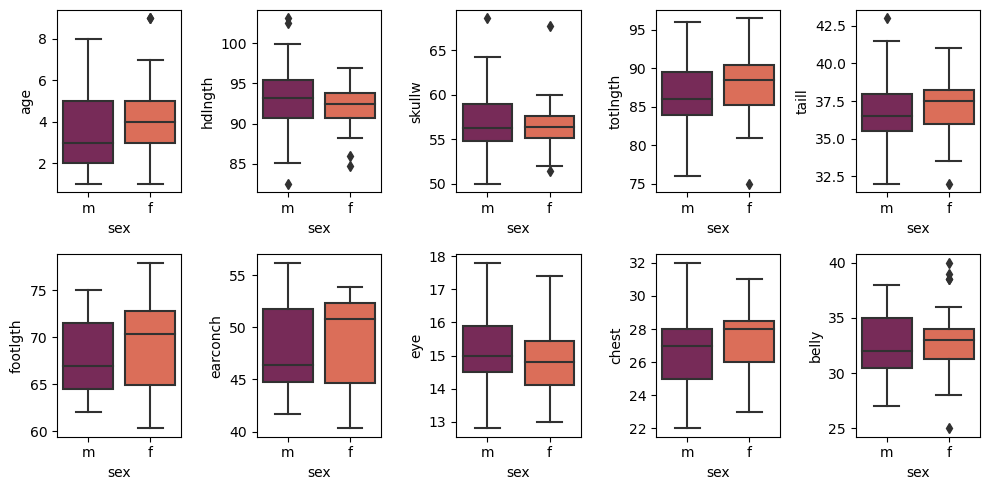

In [16]:
#plot boxplot for columns age and the columns with possum dimensions
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k,v in numerical_cols.items():
    sns.boxplot(x='sex', y=k, data=data_frame, ax=axs[index], palette="rocket")
    index = index + 1
plt.tight_layout()

From the above boxplots we can infer that female possums are longer than male possums, they have also longer foots. Tails are of similar length in both genders. Head length of the female possums appears to be quite a bit shorter than in the males possums. The age of the male possum in the dataset is from the range 0-8, the female is from the range 0-7, but there is one outlier - the feamle possum at the age of 9.
#### Let's check if the total length actually depends on possum gender.

In [17]:
#perform one-way ANOVA test
groups = []
for category, group in data_frame.groupby('sex'):
    groups.append(group['totlngth'])
    
statistic, p_value = f_oneway(*groups)

In [18]:
#make a hypothesis and interpret results
alpha = 0.05
if p_value < alpha:
    print('The possum total length depends on the possum gender')
else:
    print('The possum total length does not depend on the possum gender')

The possum total length does not depend on the possum gender


Based on the boxplots, it appears that female possums are longer than male possums. However, when using a one-way ANOVA test to determine if there is a statistically significant difference between the total length of possums based on their gender, the test resulted in a p-value greater than the chosen significance level (typically 0.05), meaning we fail to reject the null hypothesis. The null hypothesis in this case is that the possum total length does not depend on the possum gender.

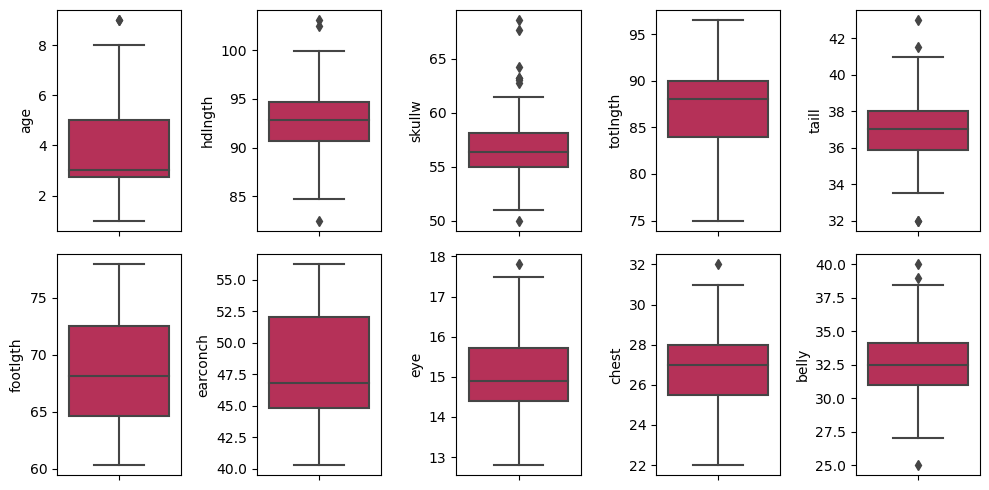

In [19]:
#plot boxplot for columns age and the columns with possum dimensions to check outliers
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k,v in numerical_cols.items():
    sns.boxplot(y=k, data=data_frame, ax=axs[index], palette="rocket")
    index = index + 1
plt.tight_layout()

In [20]:
#create a function to detect and replace the outliers with the median values
def impute_outliers_IQR(data_frame):
    q1=data_frame.quantile(0.25)
    q3=data_frame.quantile(0.75)
    IQR=q3-q1
    upper = data_frame[~(data_frame>(q3+1.5*IQR))].max()
    lower = data_frame[~(data_frame<(q1-1.5*IQR))].min()
    data_frame = np.where(data_frame > upper,data_frame.median(),np.where(data_frame < lower,data_frame.median(),data_frame))
    return data_frame

In [21]:
#replace outliers
data_frame[['hdlngth','skullw',
            'totlngth','taill', 'eye',
            'chest','belly', 
    ]] = impute_outliers_IQR(data_frame[['hdlngth','skullw',
                                        'totlngth','taill', 'eye',
                                            'chest','belly', ]])

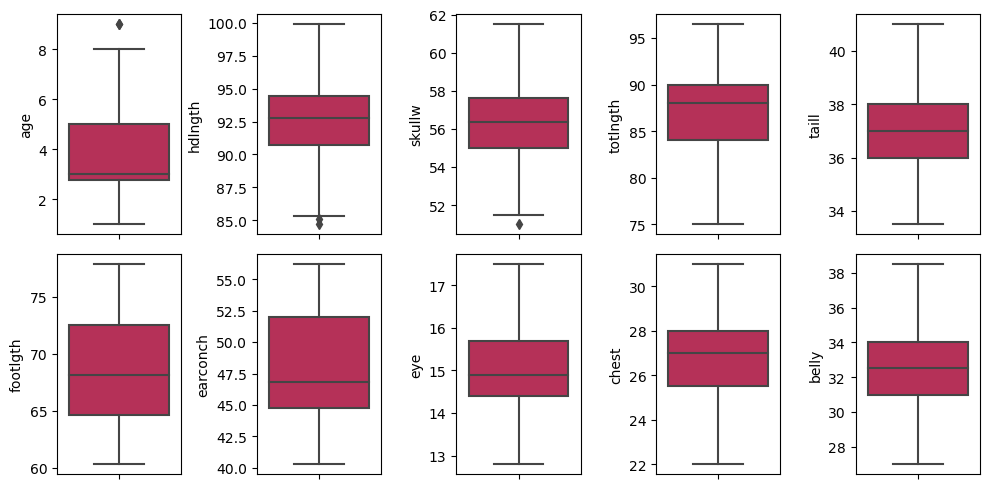

In [22]:
#plot boxplot for columns age and the columns with possum dimensions to check how they look after replacing outliers
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(10, 5))
index = 0
axs = axs.flatten()
for k,v in numerical_cols.items():
    sns.boxplot(y=k, data=data_frame, ax=axs[index], palette="rocket")
    index = index + 1
plt.tight_layout()

In [23]:
# label encoding for categorical data in "sex" column
label_encoder = preprocessing.LabelEncoder()
# encode labels in column 'sex'
data_frame['sex']= label_encoder.fit_transform(data_frame['sex'])

I am going to predict possum total lenght. I will use models KNN and SVM for regression. For each of them I will manually set the hyperparameters. But before I start prediction I decided to remove the column "case" from the dataset, beacuse it is an observation number, so the feature won't be informative.

In [24]:
#remove the "case" column
data_frame = data_frame.drop('case', axis=1)

In [25]:
#define the target and the features
target = 'totlngth'
X = data_frame.drop(target,axis=1).copy()#features
y = data_frame[target].copy() #target

### K-nearest neighbors 

For the KNN model I will select 8 features for my model using `SequentialFeatureSelector`

In [26]:
#create the KNN model, scaler and piepline for Sequential Feature Selector
knn = KNeighborsRegressor()
scaler = StandardScaler()
pipe_knn = Pipeline([("scaler", scaler), ("knn", knn)])

In [27]:
#create and fit Sequential Feature Selector
sfs_forward = SequentialFeatureSelector(
    pipe_knn, n_features_to_select=8, direction="forward").fit(X,y)

In [28]:
#check the selected features names
X.columns[sfs_forward.get_support()]

Index(['site', 'sex', 'hdlngth', 'skullw', 'taill', 'footlgth', 'eye',
       'chest'],
      dtype='object')

In [29]:
selected_columns = X.columns[sfs_forward.get_support()]

In [30]:
# split the dataset into train and test data with only selected columns
X_train, X_test, y_train, y_test = train_test_split(X[selected_columns], y, test_size=0.33, random_state=42)

In [31]:
#create a model with hyperparameter n_neighbors=3 and the scaler 
knn = KNeighborsRegressor(n_neighbors=3)
scaler = StandardScaler()

In [32]:
#make a pipeline
pipe_knn = Pipeline([("scaler", scaler), ("knn", knn)])

In [33]:
pipe_knn.fit(X_train, y_train)#fit the pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=3))])

In [34]:
#check the MAE on train and test data for the model with hyperparameter n_neighbors=3
y_pred_knn = pipe_knn.predict(X_test)
y_fitted_knn = pipe_knn.predict(X_train)

print(f"Mean Absolute Error on train: {mean_absolute_error(y_train, y_fitted_knn)}")
print(f"Mean Absolute Error on test: {mean_absolute_error(y_test, y_pred_knn)}")

Mean Absolute Error on train: 1.555555555555555
Mean Absolute Error on test: 2.3580952380952382


In [35]:
#create a model with hyperparameter n_neighbors=7 and the scaler 
knn_7 = KNeighborsRegressor(n_neighbors=7)
scaler = StandardScaler()

In [36]:
#make a pipeline
pipe_knn_7 = Pipeline([("scaler", scaler), ("knn", knn_7)])

In [37]:
pipe_knn_7.fit(X_train, y_train)#fit the pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=7))])

In [38]:
#check the MAE on tran and test data for the model with hyperparameter n_neighbors=7
y_pred_knn_7 = pipe_knn_7.predict(X_test)
y_fitted_knn_7 = pipe_knn_7.predict(X_train)

print(f"Mean Absolute Error on train: {mean_absolute_error(y_train, y_fitted_knn_7)}")
print(f"Mean Absolute Error on test: {mean_absolute_error(y_test, y_pred_knn_7)}")

Mean Absolute Error on train: 2.0320910973084887
Mean Absolute Error on test: 2.197551020408163


In [39]:
#create a model with hyperparameter n_neighbors=10 and the scaler 
knn_10 = KNeighborsRegressor(n_neighbors=10)
scaler = StandardScaler()

In [40]:
#make a pipeline
pipe_knn_10 = Pipeline([("scaler", scaler), ("knn", knn_10)])

In [41]:
pipe_knn_10.fit(X_train, y_train)#fit the pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsRegressor(n_neighbors=10))])

In [42]:
#check the MAE on tran and test data for the model with hyperparameter n_neighbors=10
y_pred_knn_10 = pipe_knn_10.predict(X_test)
y_fitted_knn_10 = pipe_knn_10.predict(X_train)

print(f"Mean Absolute Error on train: {mean_absolute_error(y_train, y_fitted_knn_10)}")
print(f"Mean Absolute Error on test: {mean_absolute_error(y_test, y_pred_knn_10)}")

Mean Absolute Error on train: 2.1963768115942033
Mean Absolute Error on test: 2.129999999999999


### Support Vector Machines - SVM Regressor
Now I am going to do the same using SVM regressor (SVR) model, for feature selection I will also use `SequentialFeatureSelector` but with the "backward" direction.

In [43]:
#create a scaler, model and a pipeline for SequentialFeatureSelector
scaler_svm = StandardScaler()
svm = SVR()
pipeline_svm = Pipeline([("scaler_svm", scaler_svm), ("svm", svm)])

In [44]:
#create Sequential Feature Selector for pipeline_svm 
sfs_forward_svm = SequentialFeatureSelector(
    pipeline_svm, n_features_to_select=8, direction="backward").fit(X,y)

In [45]:
#check the slected features columns names
X.columns[sfs_forward_svm.get_support()]

Index(['site', 'hdlngth', 'skullw', 'taill', 'footlgth', 'eye', 'chest',
       'belly'],
      dtype='object')

In [46]:
selected_columns_svm = X.columns[sfs_forward_svm.get_support()]

In [47]:
# create the test and train dataset for selected columns for SVR
X_train_svm, X_test_svm, y_train_svm, y_test_svm= train_test_split(X[selected_columns_svm], y, test_size=0.30, random_state=42)

In [48]:
#create a SVR model with hyperparameter C=0.5 and the scaler 
svm_05 = SVR(C=0.5)
scaler = StandardScaler()

In [49]:
#make a pipeline
pipe_svm_05 = Pipeline([("scaler", scaler), ("svm", svm_05)])

In [50]:
pipe_svm_05.fit(X_train_svm, y_train_svm)#fit the pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVR(C=0.5))])

In [51]:
#check the MAE on tran and test data for the SVR model with hyperparameter C=2
y_pred_svm_05 = pipe_svm_05.predict(X_test_svm)
y_fitted_svm_05 = pipe_svm_05.predict(X_train_svm)

print(f"Mean Absolute Error on train: {mean_absolute_error(y_train_svm, y_fitted_svm_05)}")
print(f"Mean Absolute Error on test: {mean_absolute_error(y_test_svm, y_pred_svm_05)}")

Mean Absolute Error on train: 2.469198344374548
Mean Absolute Error on test: 2.57281981284293


In [52]:
#create a SVR model with hyperparameter C=1.5 and the scaler 
svm_1_5 = SVR(C=1.5)
scaler = StandardScaler()

In [53]:
#make a pipeline
pipe_svm_1_5 = Pipeline([("scaler", scaler), ("svm", svm_1_5)])

In [54]:
pipe_svm_1_5.fit(X_train_svm, y_train_svm)

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVR(C=1.5))])

In [55]:
#check the MAE on tran and test data for the SVR model with hyperparameter C=1.5
y_pred_svm_1_5 = pipe_svm_1_5.predict(X_test_svm)
y_fitted_svm_1_5 = pipe_svm_1_5.predict(X_train_svm)

print(f"Mean Absolute Error on train: {mean_absolute_error(y_train_svm, y_fitted_svm_1_5)}")
print(f"Mean Absolute Error on test: {mean_absolute_error(y_test_svm, y_pred_svm_1_5)}")

Mean Absolute Error on train: 1.6602560811320661
Mean Absolute Error on test: 2.0911576578670155


In [56]:
#create a SVR model with hyperparameter C=5 and the scaler 
svm_5 = SVR(C=5)
scaler = StandardScaler()

In [57]:
#make a pipeline
pipe_svm_5 = Pipeline([("scaler", scaler), ("svm", svm_5)])

In [58]:
pipe_svm_5.fit(X_train_svm, y_train_svm)#fit the pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('svm', SVR(C=5))])

In [59]:
#check the MAE on tran and test data for the SVR model with hyperparameter C=5
y_pred_svm_5 = pipe_svm_5.predict(X_test_svm)
y_fitted_svm_5 = pipe_svm_5.predict(X_train_svm)

print(f"Mean Absolute Error on train: {mean_absolute_error(y_train_svm, y_fitted_svm_5)}")
print(f"Mean Absolute Error on test: {mean_absolute_error(y_test_svm, y_pred_svm_5)}")

Mean Absolute Error on train: 0.960764288175616
Mean Absolute Error on test: 2.0997229296296043


In [60]:
r2_knn = r2_score(y_test, y_pred_knn)
r2_knn_7 = r2_score(y_test, y_pred_knn_7)
r2_knn_10 = r2_score(y_test, y_pred_knn_10)

In [61]:
print("R-squared Score for KNN 3 neighbor: ", r2_knn)
print("R-squared Score for KNN 7 neighbor: ", r2_knn_7)
print("R-squared Score for KNN 10 neighbor: ", r2_knn_10)

R-squared Score for KNN 3 neighbor:  0.3739208821144072
R-squared Score for KNN 7 neighbor:  0.418841655635796
R-squared Score for KNN 10 neighbor:  0.42255889758305887


In [62]:
r2_svm_01 = r2_score(y_test_svm,y_pred_svm_05)
r2_svm_1_5 = r2_score(y_test_svm,y_pred_svm_1_5)
r2_svm_5 = r2_score(y_test_svm,y_pred_svm_5)

In [63]:
print("R-squared Score for the SVR model and hyperparameter C=0.5: ", r2_svm_01)
print("R-squared Score for the SVR model and hyperparameter C=1.5: ", r2_svm_1_5)
print("R-squared Score for the SVR model and hyperparameter C=5: ", r2_svm_5)

R-squared Score for the SVR model and hyperparameter C=0.5:  0.28233767573988644
R-squared Score for the SVR model and hyperparameter C=1.5:  0.480186005296364
R-squared Score for the SVR model and hyperparameter C=5:  0.4788155732025501


Neither model resutled with satisfactory results. All of them have R2 score below 50%. Now I will do the same but using Random Forest to see if it is the data or maybe the model I used didn't work fot the dataset.

### Random Forest 

In [64]:
#define the objective function to search the best parameters using the optuna library
def objective(trial):
    # Define the hyperparameters to optimize
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000, step=100),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
    }
    
    #create a RandomForestRegressor with the hyperparameters
    rf_regressor = RandomForestRegressor(**params,  random_state=42)
    rf_regressor.fit(X_train, y_train)
    #perform cross-validation with the Random Forest Regressor
    #predict on test data
    y_pred = rf_regressor.predict(X_test)
    return mean_absolute_percentage_error(y_test, y_pred)

In [65]:
#create a study object for the optimization process 
study = optuna.create_study(direction='minimize', study_name='regression')
study.optimize(objective, n_trials=100)#optimization process 

[I 2023-05-14 09:41:15,081] A new study created in memory with name: regression
[I 2023-05-14 09:41:15,739] Trial 0 finished with value: 0.026176112198892737 and parameters: {'n_estimators': 900, 'max_depth': 6, 'min_samples_split': 3, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 0 with value: 0.026176112198892737.
[I 2023-05-14 09:41:16,354] Trial 1 finished with value: 0.025941731596215604 and parameters: {'n_estimators': 900, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.025941731596215604.
[I 2023-05-14 09:41:17,042] Trial 2 finished with value: 0.025584270045893705 and parameters: {'n_estimators': 1000, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 2 with value: 0.025584270045893705.
[I 2023-05-14 09:41:17,653] Trial 3 finished with value: 0.026935094841796126 and parameters: {'n_estimators': 900, 'max_depth': 7, 'min_samples_split': 9, 

[I 2023-05-14 09:41:26,714] Trial 25 finished with value: 0.026112717630536884 and parameters: {'n_estimators': 500, 'max_depth': 8, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.024915754044831585.
[I 2023-05-14 09:41:27,274] Trial 26 finished with value: 0.025503159947449665 and parameters: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.024915754044831585.
/home/sylwia/anaconda3/envs/projects/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
[I 2023-05-14 09:41:27,735] Trial 27 finished with value: 0.026175803676313975 and parameters: {'n_estimators': 600, 

[I 2023-05-14 09:41:40,176] Trial 52 finished with value: 0.02497536002131219 and parameters: {'n_estimators': 600, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.024915754044831585.
[I 2023-05-14 09:41:40,675] Trial 53 finished with value: 0.025200191941849224 and parameters: {'n_estimators': 700, 'max_depth': 9, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.024915754044831585.
[I 2023-05-14 09:41:41,238] Trial 54 finished with value: 0.02529760867920467 and parameters: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.024915754044831585.
[I 2023-05-14 09:41:41,727] Trial 55 finished with value: 0.026943861215473503 and parameters: {'n_estimators': 700, 'max_depth': 10, 'min_samples_split': 8, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 13 with valu

[I 2023-05-14 09:41:49,924] Trial 80 finished with value: 0.025860549482149456 and parameters: {'n_estimators': 700, 'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 60 with value: 0.024890222164838775.
[I 2023-05-14 09:41:50,426] Trial 81 finished with value: 0.024926003447319267 and parameters: {'n_estimators': 700, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 60 with value: 0.024890222164838775.
[I 2023-05-14 09:41:50,996] Trial 82 finished with value: 0.02496861000213263 and parameters: {'n_estimators': 800, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 60 with value: 0.024890222164838775.
[I 2023-05-14 09:41:51,432] Trial 83 finished with value: 0.02497536002131219 and parameters: {'n_estimators': 600, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 60 with valu

In [66]:
#create Random Forest Regressor model using the best parameters
rf_regressor = RandomForestRegressor(**study.best_params, random_state=42)
rf_regressor.fit(X_train, y_train)#train the model
y_fitted_rf = rf_regressor.predict(X_train)#fit the model
y_pred_rf = rf_regressor.predict(X_test)# make a prediction

In [67]:
#check R2 score for the model
print(r2_score(y_test,y_pred_rf))

0.4947641435126029


The Random Forest model also didn't get the satisfactory result. The R2 score is about 0,5. So probably it's not a problem with the models, maybe it is the dataset. Let's check correlation in the dataset and plot a scatterplot for each pair of variables to check how the data looks.

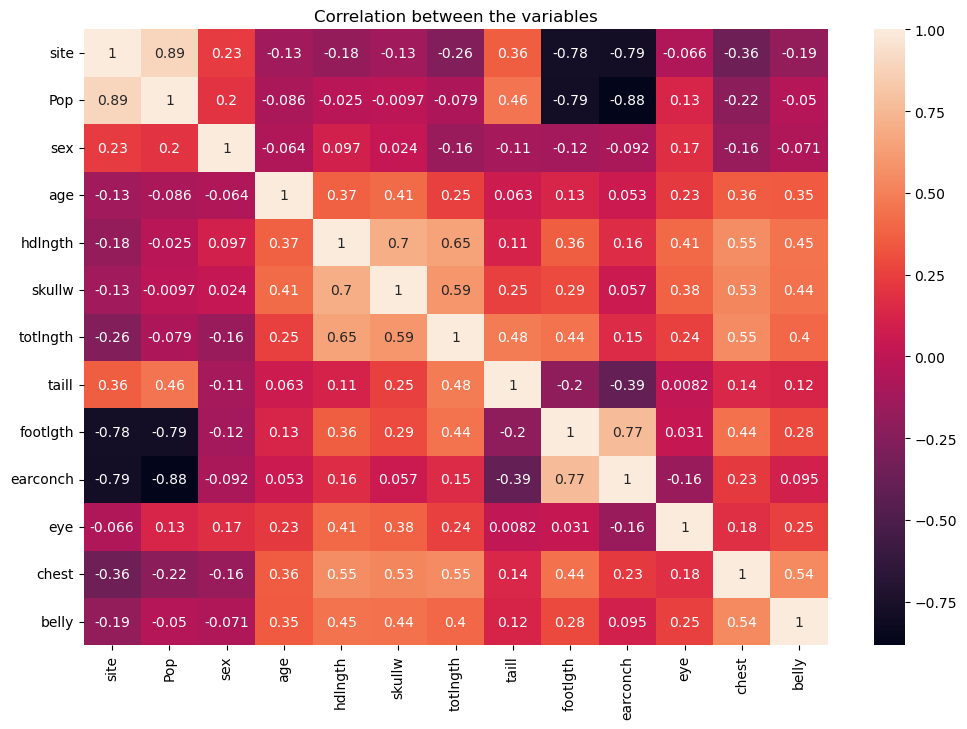

In [68]:
plt.figure(figsize=(12,8))
dataplot = sns.heatmap(data_frame.corr(numeric_only=True), cmap="rocket", annot=True)
plt.title('Correlation between the variables')
plt.show()

Checking the correlation between target variable and the features we can see that the highest correlation with the target have the features "head lenght" and "skull weight" 0,65 and 0,59, but porbably those two features with good/average correlation may not capture all the relevant information for accurately predicting the target variable.

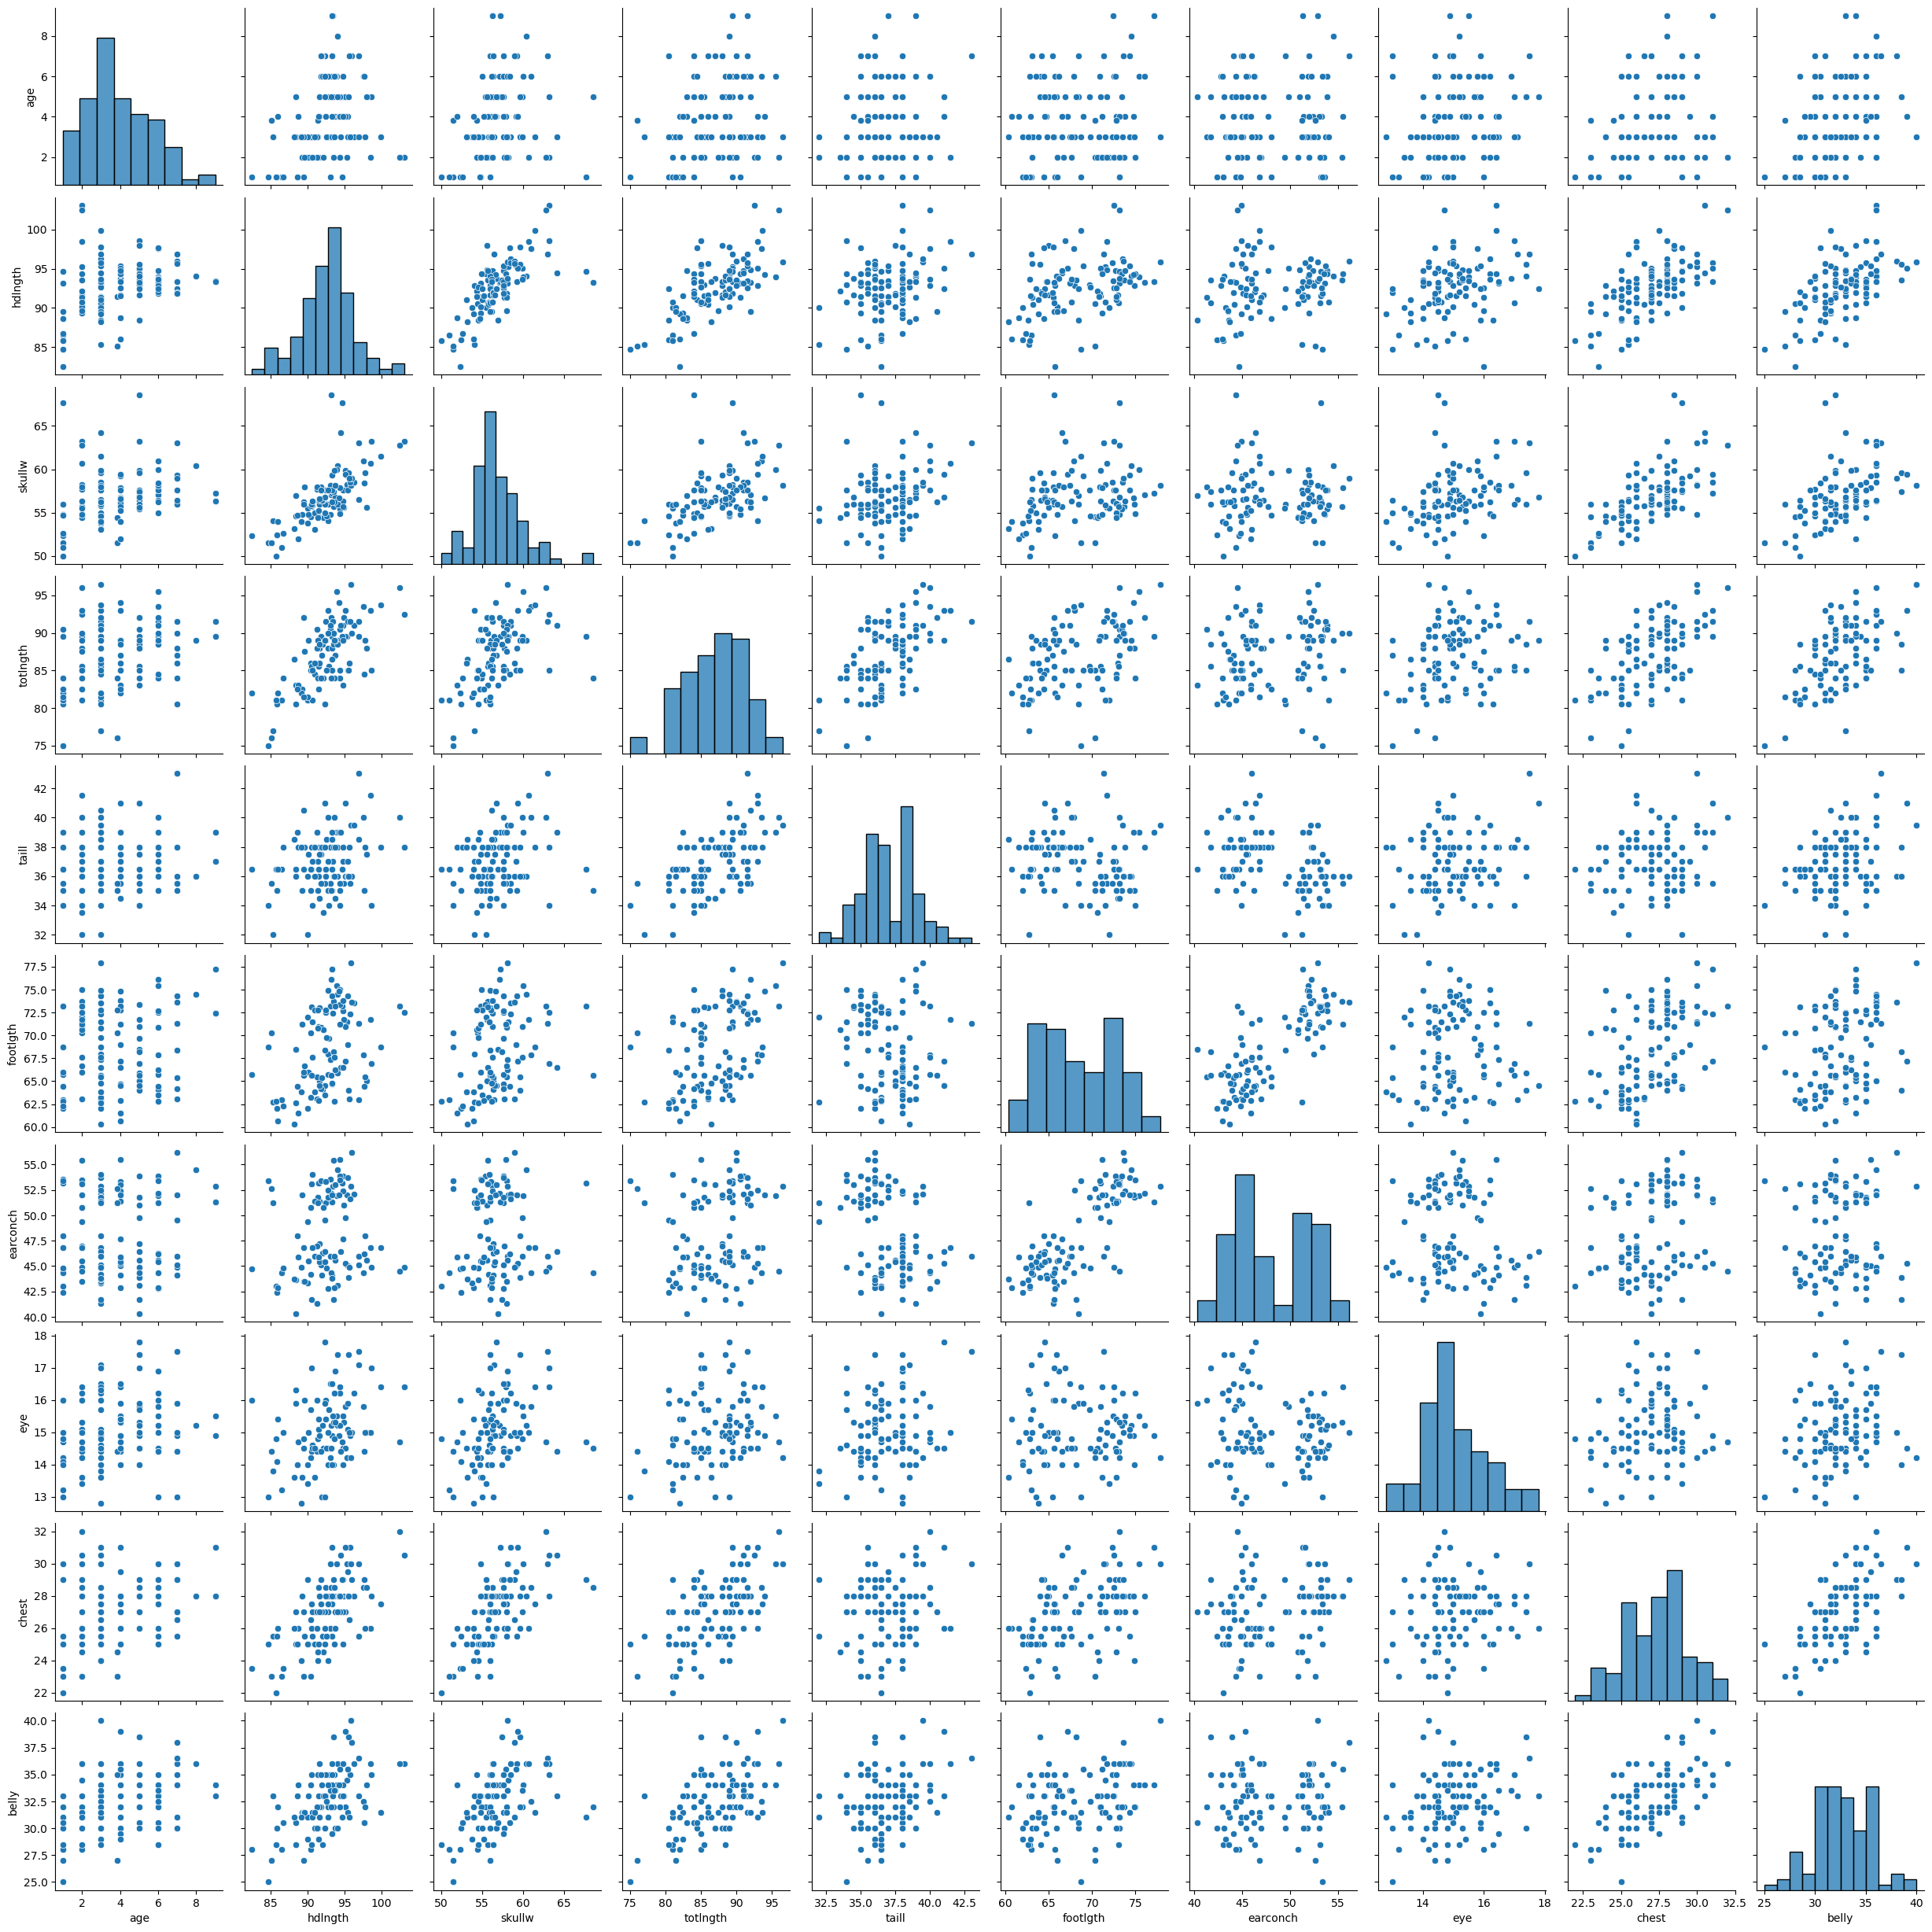

In [69]:
#plot a pairplot (a scatterplot for each pair of variables)
sns.pairplot(numerical_cols)
plt.show()

Looking at points in the scatter plot almost all of them appear scattered randomly with no discernible pattern, it suggests no significant relationship between the variables.
### Conclusion
The size of the dataset might not be enough to accurately capture the relationships between the features and the target variable. Having only 104 observations is probably difficult to catch the complexity and variability of possum characteristics. Increasing the sample size through data collection efforts could provide a better results.